              precision    recall  f1-score   support

           0       0.76      0.79      0.78        33
           1       0.92      0.91      0.91        87

    accuracy                           0.88       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.88      0.88      0.88       120



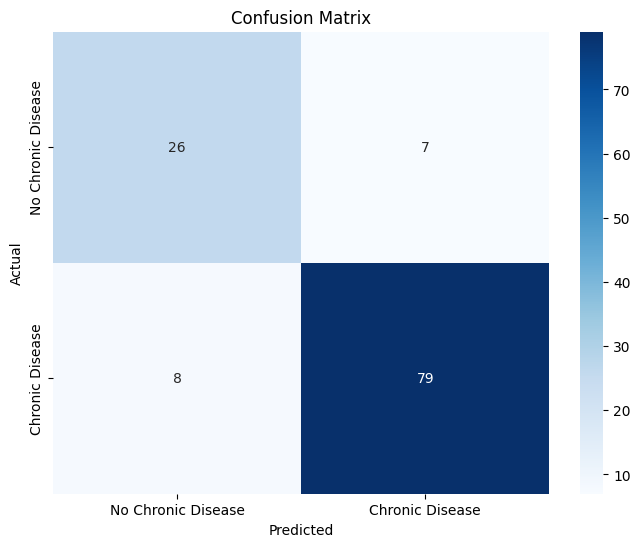

AUC Score: 0.9501915708812261


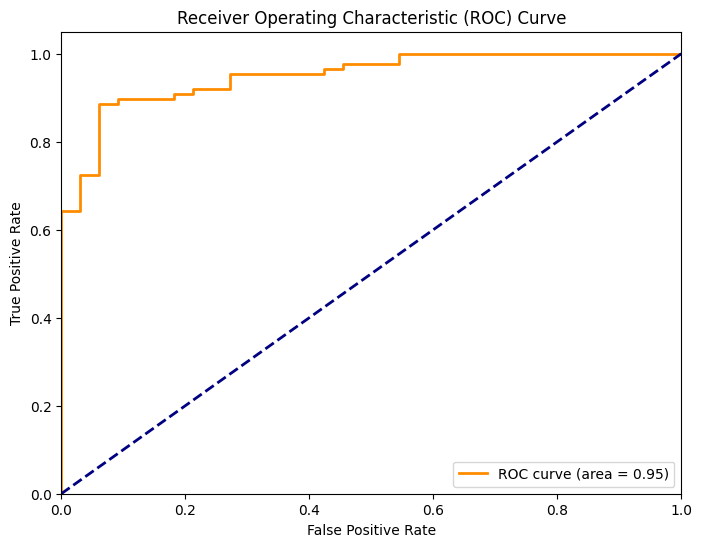

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/kshedden/statswpy-nhanes/master/merged/nhanes_2015_2016.csv"
data = pd.read_csv(url)

# Select relevant features
relevant_columns = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 
    'DMDMARTL', 'DMDHHSIZ', 'INDFMPIR', 'ALQ101', 'ALQ110', 'ALQ130', 
    'SMQ020', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 
    'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST'
]

features = data[relevant_columns]

# Create the custom target variable
data['CHRONIC'] = (
    (data['BPXSY1'] > 140) |
    (data['BPXDI1'] > 90) |
    (data['BMXBMI'] > 30) |
    ((data['RIAGENDR'] == 1) & (data['BMXWAIST'] > 102)) |  # Men with waist > 102 cm
    ((data['RIAGENDR'] == 2) & (data['BMXWAIST'] > 88))    # Women with waist > 88 cm
).astype(int)

# Define features and target
X = features
y = data['CHRONIC']

# Drop rows with missing values in the features or target
X = X.dropna()
y = y.loc[X.index]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
model = SVC(kernel='rbf', probability=True)  # probability=True for ROC curve
model.fit(X_train_scaled, y_train)

# Evaluate the model and report its features with precision, recall, and F-Score
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Chronic Disease', 'Chronic Disease'], yticklabels=['No Chronic Disease', 'Chronic Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Compare all of the kernels and choose the best one:

Linear Kernel - F1-Score: 0.9418604651162791
Poly Kernel - F1-Score: 0.9180327868852459
Rbf Kernel - F1-Score: 0.9132947976878613
Sigmoid Kernel - F1-Score: 0.9142857142857143

Best kernel: linear
Best F1-Score: 0.9418604651162791

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.95      0.93      0.94        87

    accuracy                           0.92       120
   macro avg       0.89      0.90      0.90       120
weighted avg       0.92      0.92      0.92       120



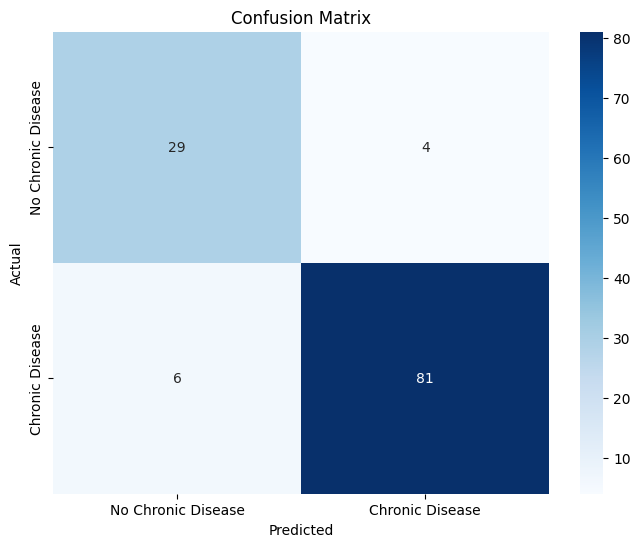

AUC Score: 0.9501915708812261


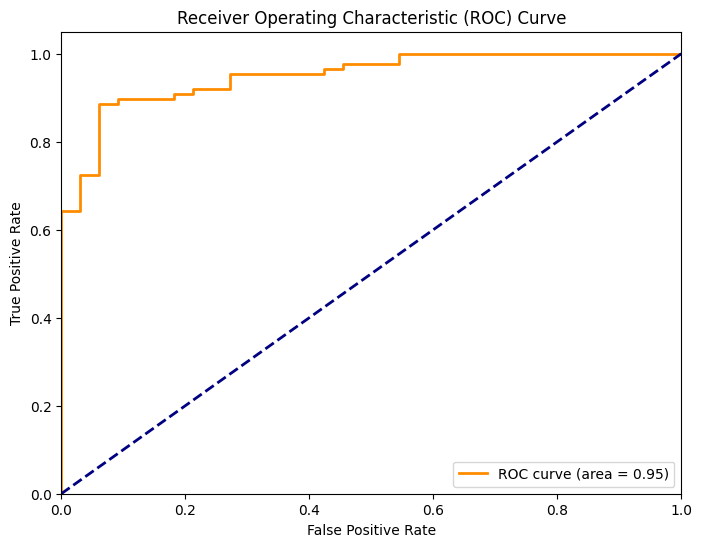

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/kshedden/statswpy-nhanes/master/merged/nhanes_2015_2016.csv"
data = pd.read_csv(url)

# Select relevant features
relevant_columns = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 
    'DMDMARTL', 'DMDHHSIZ', 'INDFMPIR', 'ALQ101', 'ALQ110', 'ALQ130', 
    'SMQ020', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 
    'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST'
]

features = data[relevant_columns]

# Create the custom target variable
data['CHRONIC'] = (
    (data['BPXSY1'] > 140) |
    (data['BPXDI1'] > 90) |
    (data['BMXBMI'] > 30) |
    ((data['RIAGENDR'] == 1) & (data['BMXWAIST'] > 102)) |  # Men with waist > 102 cm
    ((data['RIAGENDR'] == 2) & (data['BMXWAIST'] > 88))    # Women with waist > 88 cm
).astype(int)

# Define features and target
X = features
y = data['CHRONIC']

# Drop rows with missing values in the features or target
X = X.dropna()
y = y.loc[X.index]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the SVM model with different kernels
def evaluate_svm_kernel(kernel):
    svm = SVC(kernel=kernel, probability=True)  # probability=True for ROC curve
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    y_proba = svm.predict_proba(X_test_scaled)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    return f1, y_pred, y_proba

# Evaluate different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    f1, y_pred, y_proba = evaluate_svm_kernel(kernel)
    results[kernel] = {
        'f1': f1,
        'y_pred': y_pred,
        'y_proba': y_proba
    }
    print(f"{kernel.capitalize()} Kernel - F1-Score: {f1}")

# Find the best kernel based on the highest F1-score
best_kernel = max(results, key=lambda k: results[k]['f1'])
best_f1 = results[best_kernel]['f1']
best_y_pred = results[best_kernel]['y_pred']
best_y_proba = results[best_kernel]['y_proba']

print(f"\nBest kernel: {best_kernel}")
print(f"Best F1-Score: {best_f1}")
print("\nClassification Report:")
print(classification_report(y_test, best_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Chronic Disease', 'Chronic Disease'], yticklabels=['No Chronic Disease', 'Chronic Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()